In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
def visualize_frequency_components(image_path):
  # Read the Image
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  # Applying 2D Fourier Transform
  f_transform = np.fft.fft2(image)
  f_transform_shifted = np.fft.fftshift(f_transform)

  # Calculating the magnitude spectrum
  magnitude_spectrum = np.log(np.abs(f_transform_shifted)+1)

  # Calculating the phase spectrum
  phase_spectrum = np.angle(f_transform_shifted)

  # Displaying the Images
  plt.figure(figsize=(12,12))

  plt.subplot(3,2,1)
  plt.imshow(image)
  plt.title("Original Image")
  plt.axis('off')

  plt.subplot(3,2,2)
  plt.imshow(magnitude_spectrum, cmap='gray')
  plt.title("Magnitude Spectrum")
  plt.axis('off')

  plt.subplot(3,2,3)
  plt.imshow(phase_spectrum, cmap='gray')
  plt.title("Phase Spectrum")
  plt.axis('off')

  plt.subplot(3,2,4)
  plt.imshow(np.real(f_transform_shifted), cmap='gray')
  plt.title("Real Part of Fourier Transform")
  plt.axis('off')

  plt.subplot(3,2,5)
  plt.imshow(np.imag(f_transform_shifted), cmap='gray')
  plt.title("Imaginary Part of Fourier Transform")
  plt.axis('off')

  plt.subplot(3,2,6)
  plt.imshow(np.angle(f_transform_shifted), cmap='gray')
  plt.title("Angle of Fourier Transform")
  plt.axis('off')

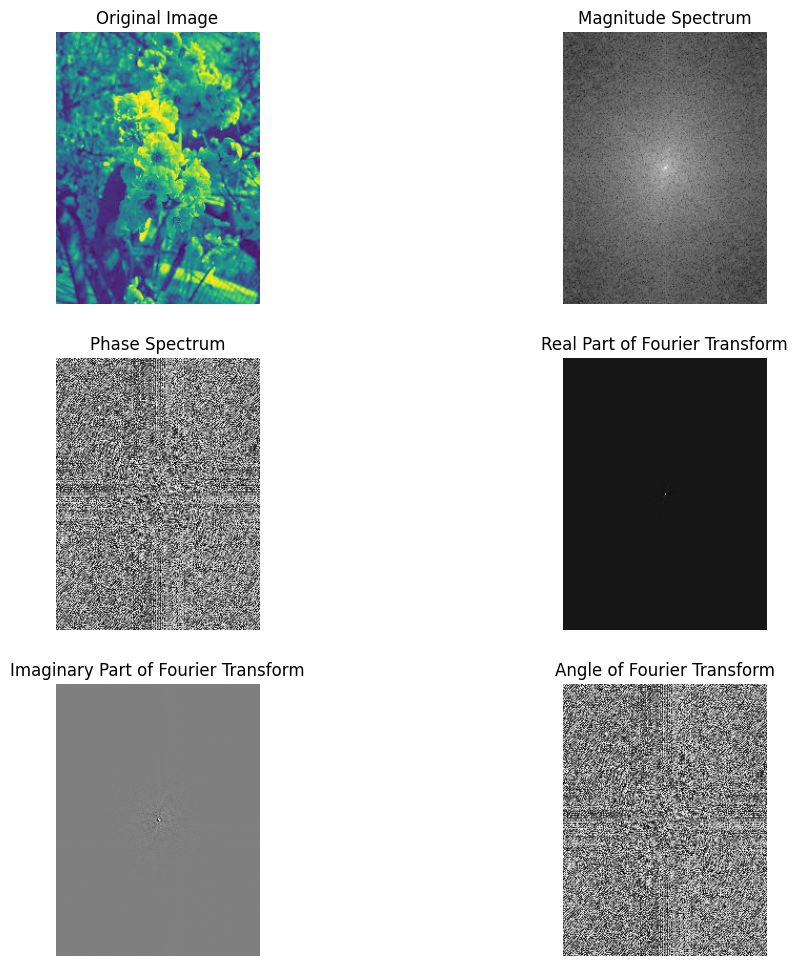

In [ ]:
visualize_frequency_components("/content/cherryblossom.jpg")

In [ ]:
def enhance_img(image_path, kernel_size=15, alpha=1.5):
  # Reading the Image
  img = cv2.imread(image_path)

  # Converting the image to grayscale
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply low-pass filter using Gaussian blur
  blurred_img = cv2.GaussianBlur(gray_img, (kernel_size, kernel_size), 0)

  # Apply High pass filter using Gaussian blur
  laplacian = cv2.Laplacian(blurred_img, cv2.CV_64F)

  enhanced_img = gray_img + alpha*laplacian

  # Clipping the pixle values to valid range [0, 255]
  enhanced_img = np.clip(enhanced_img, 0, 255).astype(np.uint8)

  # Displaying the original and enhanced images
  plt.figsize =(12,6)

  plt.subplot(3,1,1)
  plt.imshow(gray_img, cmap='gray')
  plt.title('Original Image')
  plt.axis('off')

  plt.subplot(3,1,2)
  plt.imshow(blurred_img, cmap='gray')
  plt.title('Low-pass Filter (Gaussian Blur)')
  plt.axis('off')

  plt.subplot(3,1,3)
  plt.imshow(enhanced_img, cmap='gray')
  plt.title('High-pass Filter (Laplacian) + Original Image')
  plt.axis('off')

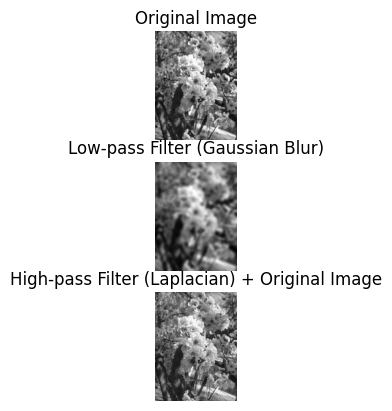

In [ ]:
enhance_img("/content/cherryblossom.jpg")